In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle
import matplotlib.colors as colors

In [2]:
R0s = np.arange(1.5, 3.3, 0.1)
rs = np.array([20, 10., 2, 1, 0.5, 0.2, 0.1, 0.05, 0.025])

param_grid = {'R0': R0s, 'r' : rs}

grid = ParameterGrid(param_grid)

para_dict = list(grid)

In [3]:
len_R0 = len(R0s)
len_r = len(rs)

In [4]:
R0s

array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2])

In [5]:
file_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_addno/'

In [6]:
def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [7]:
pop = np.loadtxt('pop_new.csv')
### analyse the data

In [8]:
Numcounty_mean =  np.zeros((len_R0,len_r))
Numcounty_std =  np.zeros((len_R0,len_r))

export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_addno/'
for R0_idx in range(len_R0): #len_R0 10,11
    R0 = R0s[R0_idx]
    
    Ensembles = np.zeros((len(rs),300,3142,60))
    for r_idx in range(len_r):
    #     print(r_idx)
        r = rs[r_idx]
        print(R0,r)
        sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
        for i in range(300):
            export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
            temp = load_gzipped_numpy(export_names)
            if len(temp) == 1:
                print(r, i)
            else:
                Ensembles[r_idx,i,:,:] = temp
        
        E_daily_per_pop = Ensembles[r_idx,:,:,-1]/pop[None,:]*100000
        num_county = np.sum(E_daily_per_pop>10,axis=1)

        mean_county = np.mean(num_county,axis=0)
        Numcounty_mean[R0_idx,r_idx] = mean_county

        std_county = np.std(num_county,axis=0)
        Numcounty_std[R0_idx,r_idx] = std_county
            
#         Newinf_mean[R0_idx,r_idx] = np.mean(Ensembles[r_idx,:,:,-1],axis=0)
#         Newinf_std[R0_idx,r_idx] = np.std(Ensembles[r_idx,:,:,-1],axis=0)

1.5 20.0
1.5 10.0
1.5 2.0
1.5 1.0
1.5 0.5
1.5 0.2
1.5 0.1
1.5 0.05
1.5 0.025
1.6 20.0
1.6 10.0
1.6 2.0
1.6 1.0
1.6 0.5
1.6 0.2
1.6 0.1
1.6 0.05
1.6 0.025
1.7000000000000002 20.0
1.7000000000000002 10.0
1.7000000000000002 2.0
1.7000000000000002 1.0
1.7000000000000002 0.5
1.7000000000000002 0.2
1.7000000000000002 0.1
1.7000000000000002 0.05
1.7000000000000002 0.025
1.8000000000000003 20.0
1.8000000000000003 10.0
1.8000000000000003 2.0
1.8000000000000003 1.0
1.8000000000000003 0.5
1.8000000000000003 0.2
1.8000000000000003 0.1
1.8000000000000003 0.05
1.8000000000000003 0.025
1.9000000000000004 20.0
1.9000000000000004 10.0
1.9000000000000004 2.0
1.9000000000000004 1.0
1.9000000000000004 0.5
1.9000000000000004 0.2
1.9000000000000004 0.1
1.9000000000000004 0.05
1.9000000000000004 0.025
2.0000000000000004 20.0
2.0000000000000004 10.0
2.0000000000000004 2.0
2.0000000000000004 1.0
2.0000000000000004 0.5
2.0000000000000004 0.2
2.0000000000000004 0.1
2.0000000000000004 0.05
2.0000000000000004 0.02

In [9]:
# for j in range(1,6):
#     Numcounty_mean[:,j] = np.loadtxt('Numcounty_mean{}'.format(j))
# for j in range(1,6):
#     Numcounty_std[:,j] = np.loadtxt('Numcounty_std{}'.format(j))
# Numcounty_mean = np.loadtxt('Numcounty_mean60.txt')
# Numcounty_std = np.loadtxt('Numcounty_std60.txt')

In [10]:
np.savetxt('Numcounty_mean60.txt', Numcounty_mean)
np.savetxt('Numcounty_std60.txt', Numcounty_std)

In [21]:
rs

array([20.   , 10.   ,  2.   ,  1.   ,  0.5  ,  0.2  ,  0.1  ,  0.05 ,
        0.025])

In [181]:
np.log(1/rs)

array([-2.99573227, -2.30258509, -0.69314718,  0.        ,  0.69314718,
        1.60943791,  2.30258509,  2.99573227,  3.68887945])

In [82]:
Z.max()

165.27333333333334

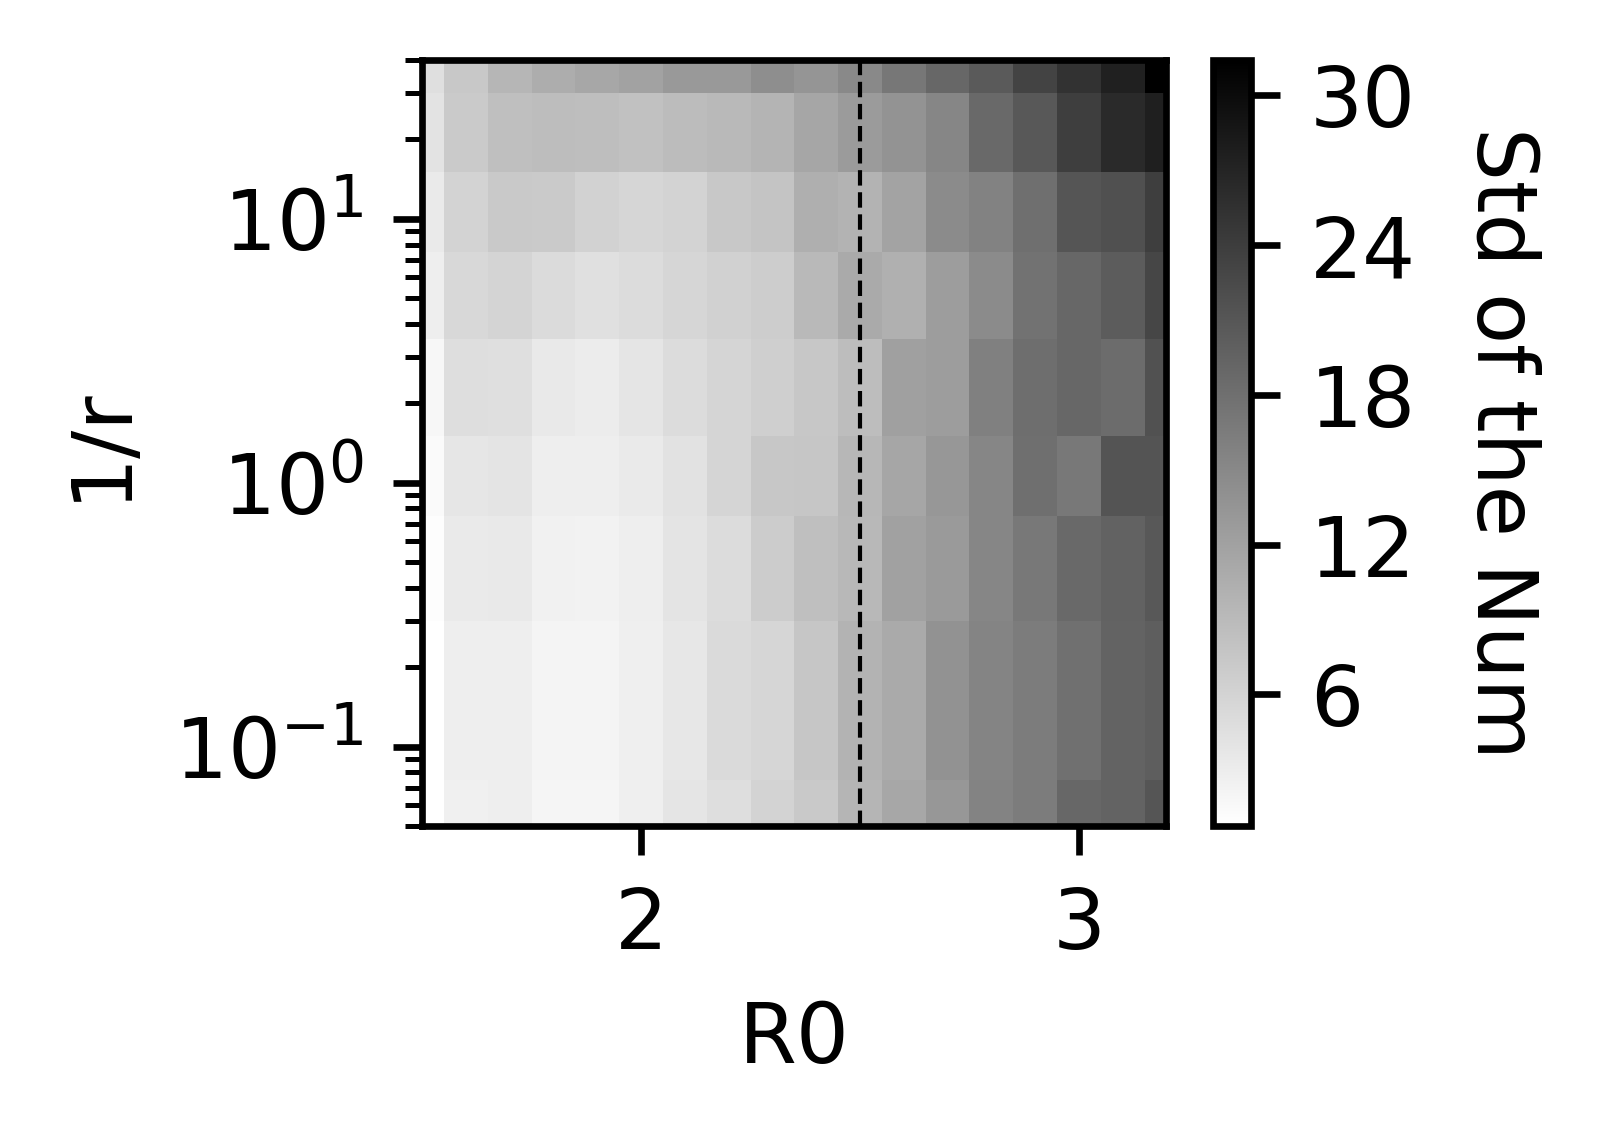

In [16]:
import matplotlib.colors as colors
y = 1/rs
x = R0s

X, Y = np.meshgrid(x, y)

# Z = Numcounty_mean.transpose()
Z = Numcounty_std.transpose()
fig, ax = plt.subplots(figsize=(2.7, 2), dpi=600)
norm = colors.TwoSlopeNorm(vmin=0, vmax=165, vcenter=90)
# norm = colors.Normalize(vmin=1, vmax=165)
# contour = ax.pcolormesh(X, Y, Z, cmap=plt.cm.Spectral_r,norm=norm) #,vmin=0, vmax=36
contour = ax.pcolormesh(X, Y, Z, cmap=plt.cm.binary) #,vmin=0, vmax=36


#contourf pcolormesh
# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
cbh.ax.tick_params(labelsize=10)
# cbh.set_label('Num of Counties', rotation=270, labelpad=20)
cbh.set_label('Std of the Num', rotation=270, labelpad=15)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
# plt.title('the number of counties per 100k population >10 at t=60', fontsize=16)
plt.xlabel('R0', fontsize=10)
plt.ylabel('1/r', fontsize=10)
plt.yscale('log')


# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=10)
ax.axvline(x=2.5, color='k', linestyle='--',lw=0.5)

import matplotlib.ticker as ticker
locator = ticker.MaxNLocator(nbins=6)  # You can change the number 5 to any desired number of ticks.
cbh.locator = locator
cbh.update_ticks()
plt.tight_layout()
plt.savefig('phase_num_std.svg')

In [10]:
### for the given R0 = 3.2
Ensembles.shape

(9, 300, 3142, 60)

In [28]:
aa = Ensembles[-1,0]

In [36]:
NewInf_ode = np.loadtxt('metapop_R025.csv')
# infec_perpop = NewInf_ode/pop[:,None]*100000
# county_ode = np.sum(infec_perpop>10,axis=0)

In [37]:
invade_t = np.zeros((3142, 60))
for t in range(60):
#     infec_perpop = NewInf_ode[:,t]/pop*100000
#     idx = np.where(infec_perpop>10)[0]
    idx = np.where(NewInf_ode[:,t]>0)[0]
#     print(idx)
    invade_t[idx,t:] = 1

In [16]:
new_counties.shape

(9, 300, 59)

In [82]:
invade_mean =  np.zeros((len_R0,len_r))
invade_std = np.zeros((len_R0,len_r))
export_dir = '/Users/qingyao/Documents/branching_data/simulation/python_cutoff_addno/'
for R0_idx in range(len_R0): #len_R0 10,11
    R0 = R0s[R0_idx]
    Ensembles = np.zeros((len(rs),300,3142,60))
    for r_idx in range(len_r):
    #     print(r_idx)
        r = rs[r_idx]
        print(R0,r)
        sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
        for i in range(300):
            export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(i+1))
            temp = load_gzipped_numpy(export_names)
            if len(temp) == 1:
                print(r, i)
            else:
                Ensembles[r_idx,i,:,:] = temp
    sp_invade_t = np.zeros((9, 300, 3142, 60))
    for t in range(60):
        condition = Ensembles[:, :, :, t] > 0
        sp_invade_t[condition,t:] = 1
    
    sp_num_invade = np.sum(sp_invade_t,axis=2)
    new_counties = np.diff(sp_num_invade,axis=2)
    
    newinf_std = np.std(new_counties,axis=2)
    newinf_mean = np.mean(new_counties,axis=2)
    
    invade_std[R0_idx,:] = np.average(newinf_std,axis=1)
    invade_mean[R0_idx,:] = np.mean(newinf_mean,axis=1)

1.5 20.0
1.5 10.0
1.5 2.0
1.5 1.0
1.5 0.5
1.5 0.2
1.5 0.1
1.5 0.05
1.5 0.025
1.6 20.0
1.6 10.0
1.6 2.0
1.6 1.0
1.6 0.5
1.6 0.2
1.6 0.1
1.6 0.05
1.6 0.025
1.7000000000000002 20.0
1.7000000000000002 10.0
1.7000000000000002 2.0
1.7000000000000002 1.0
1.7000000000000002 0.5
1.7000000000000002 0.2
1.7000000000000002 0.1
1.7000000000000002 0.05
1.7000000000000002 0.025
1.8000000000000003 20.0
1.8000000000000003 10.0
1.8000000000000003 2.0
1.8000000000000003 1.0
1.8000000000000003 0.5
1.8000000000000003 0.2
1.8000000000000003 0.1
1.8000000000000003 0.05
1.8000000000000003 0.025
1.9000000000000004 20.0
1.9000000000000004 10.0
1.9000000000000004 2.0
1.9000000000000004 1.0
1.9000000000000004 0.5
1.9000000000000004 0.2
1.9000000000000004 0.1
1.9000000000000004 0.05
1.9000000000000004 0.025
2.0000000000000004 20.0
2.0000000000000004 10.0
2.0000000000000004 2.0
2.0000000000000004 1.0
2.0000000000000004 0.5
2.0000000000000004 0.2
2.0000000000000004 0.1
2.0000000000000004 0.05
2.0000000000000004 0.02

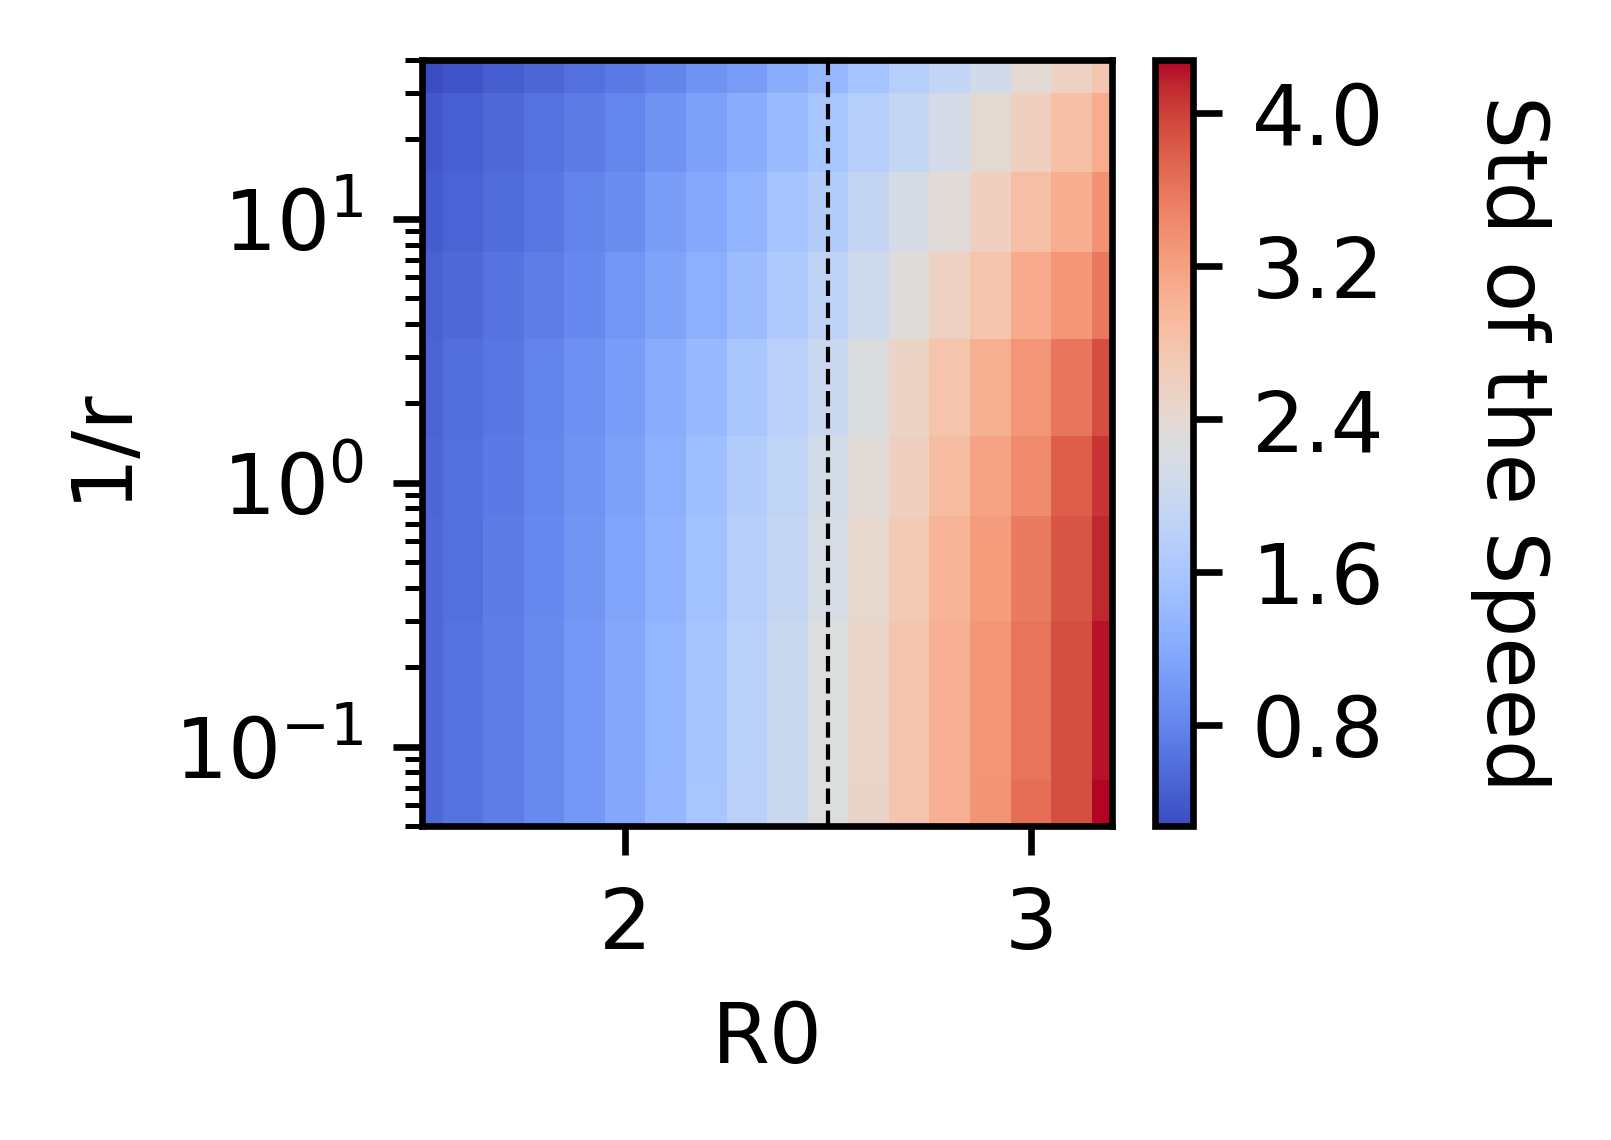

In [53]:

y = 1/rs
x = R0s

X, Y = np.meshgrid(x, y)

Z = invade_mean.transpose()
# Z = invade_std.transpose()
fig, ax = plt.subplots(figsize=(2.7, 2), dpi=600)
norm = colors.TwoSlopeNorm(vmin=0, vmax=0.65, vcenter=0.3)
# norm = colors.Normalize(vmin=1, vmax=165)
contour = ax.pcolormesh(X, Y, Z, cmap=plt.cm.coolwarm) #,vmin=0, vmax=36
# contour = ax.pcolormesh(X, Y, Z, cmap=plt.cm.bone_r) #,vmin=0, vmax=36

#contourf pcolormesh
# Add colorbar
cbh = plt.colorbar(contour, orientation='vertical', pad=0.05)
cbh.ax.tick_params(labelsize=10)
cbh.set_label('Invading Speed', rotation=270, labelpad=20)
# cbh.set_label('Std of the Speed', rotation=270, labelpad=20)

# Turn off grid and set shading
# plt.grid(False)
# contour.set_edgecolor('face') # remove contour lines

# Set title and axis labels
# plt.title('the number of counties per 100k population >10 at t=60', fontsize=16)
plt.xlabel('R0', fontsize=10)
plt.ylabel('1/r', fontsize=10)
plt.yscale('log')


# Set axis limits and font size
plt.xlim([x[0], x[-1]])
plt.ylim([y[0], y[-1]])
plt.tick_params(axis='both', which='major', labelsize=10)
ax.axvline(x=2.5, color='k', linestyle='--',lw=0.5)

import matplotlib.ticker as ticker
locator = ticker.MaxNLocator(nbins=6)  # You can change the number 5 to any desired number of ticks.
cbh.locator = locator
cbh.update_ticks()
plt.tight_layout()
# plt.savefig('phase_speed.svg')

In [83]:
norm = colors.TwoSlopeNorm(vmin=0, vmax=165, vcenter=90)

In [84]:
Z_data = {'Num':Numcounty_mean.transpose(),'Std':Numcounty_std.transpose(),
          'Speed':invade_mean.transpose(),'Variation':invade_std.transpose()}

In [85]:
Z_colormap = {'Num':plt.cm.Spectral_r,'Std':plt.cm.binary,
          'Speed':plt.cm.coolwarm,'Variation':plt.cm.bone_r}

In [92]:
sub_titles = ['(a) Number of infected counties', '(b) Std of infected counties', 
              '(c) Daily invasion speed', '(d) Temporal variation of speed']

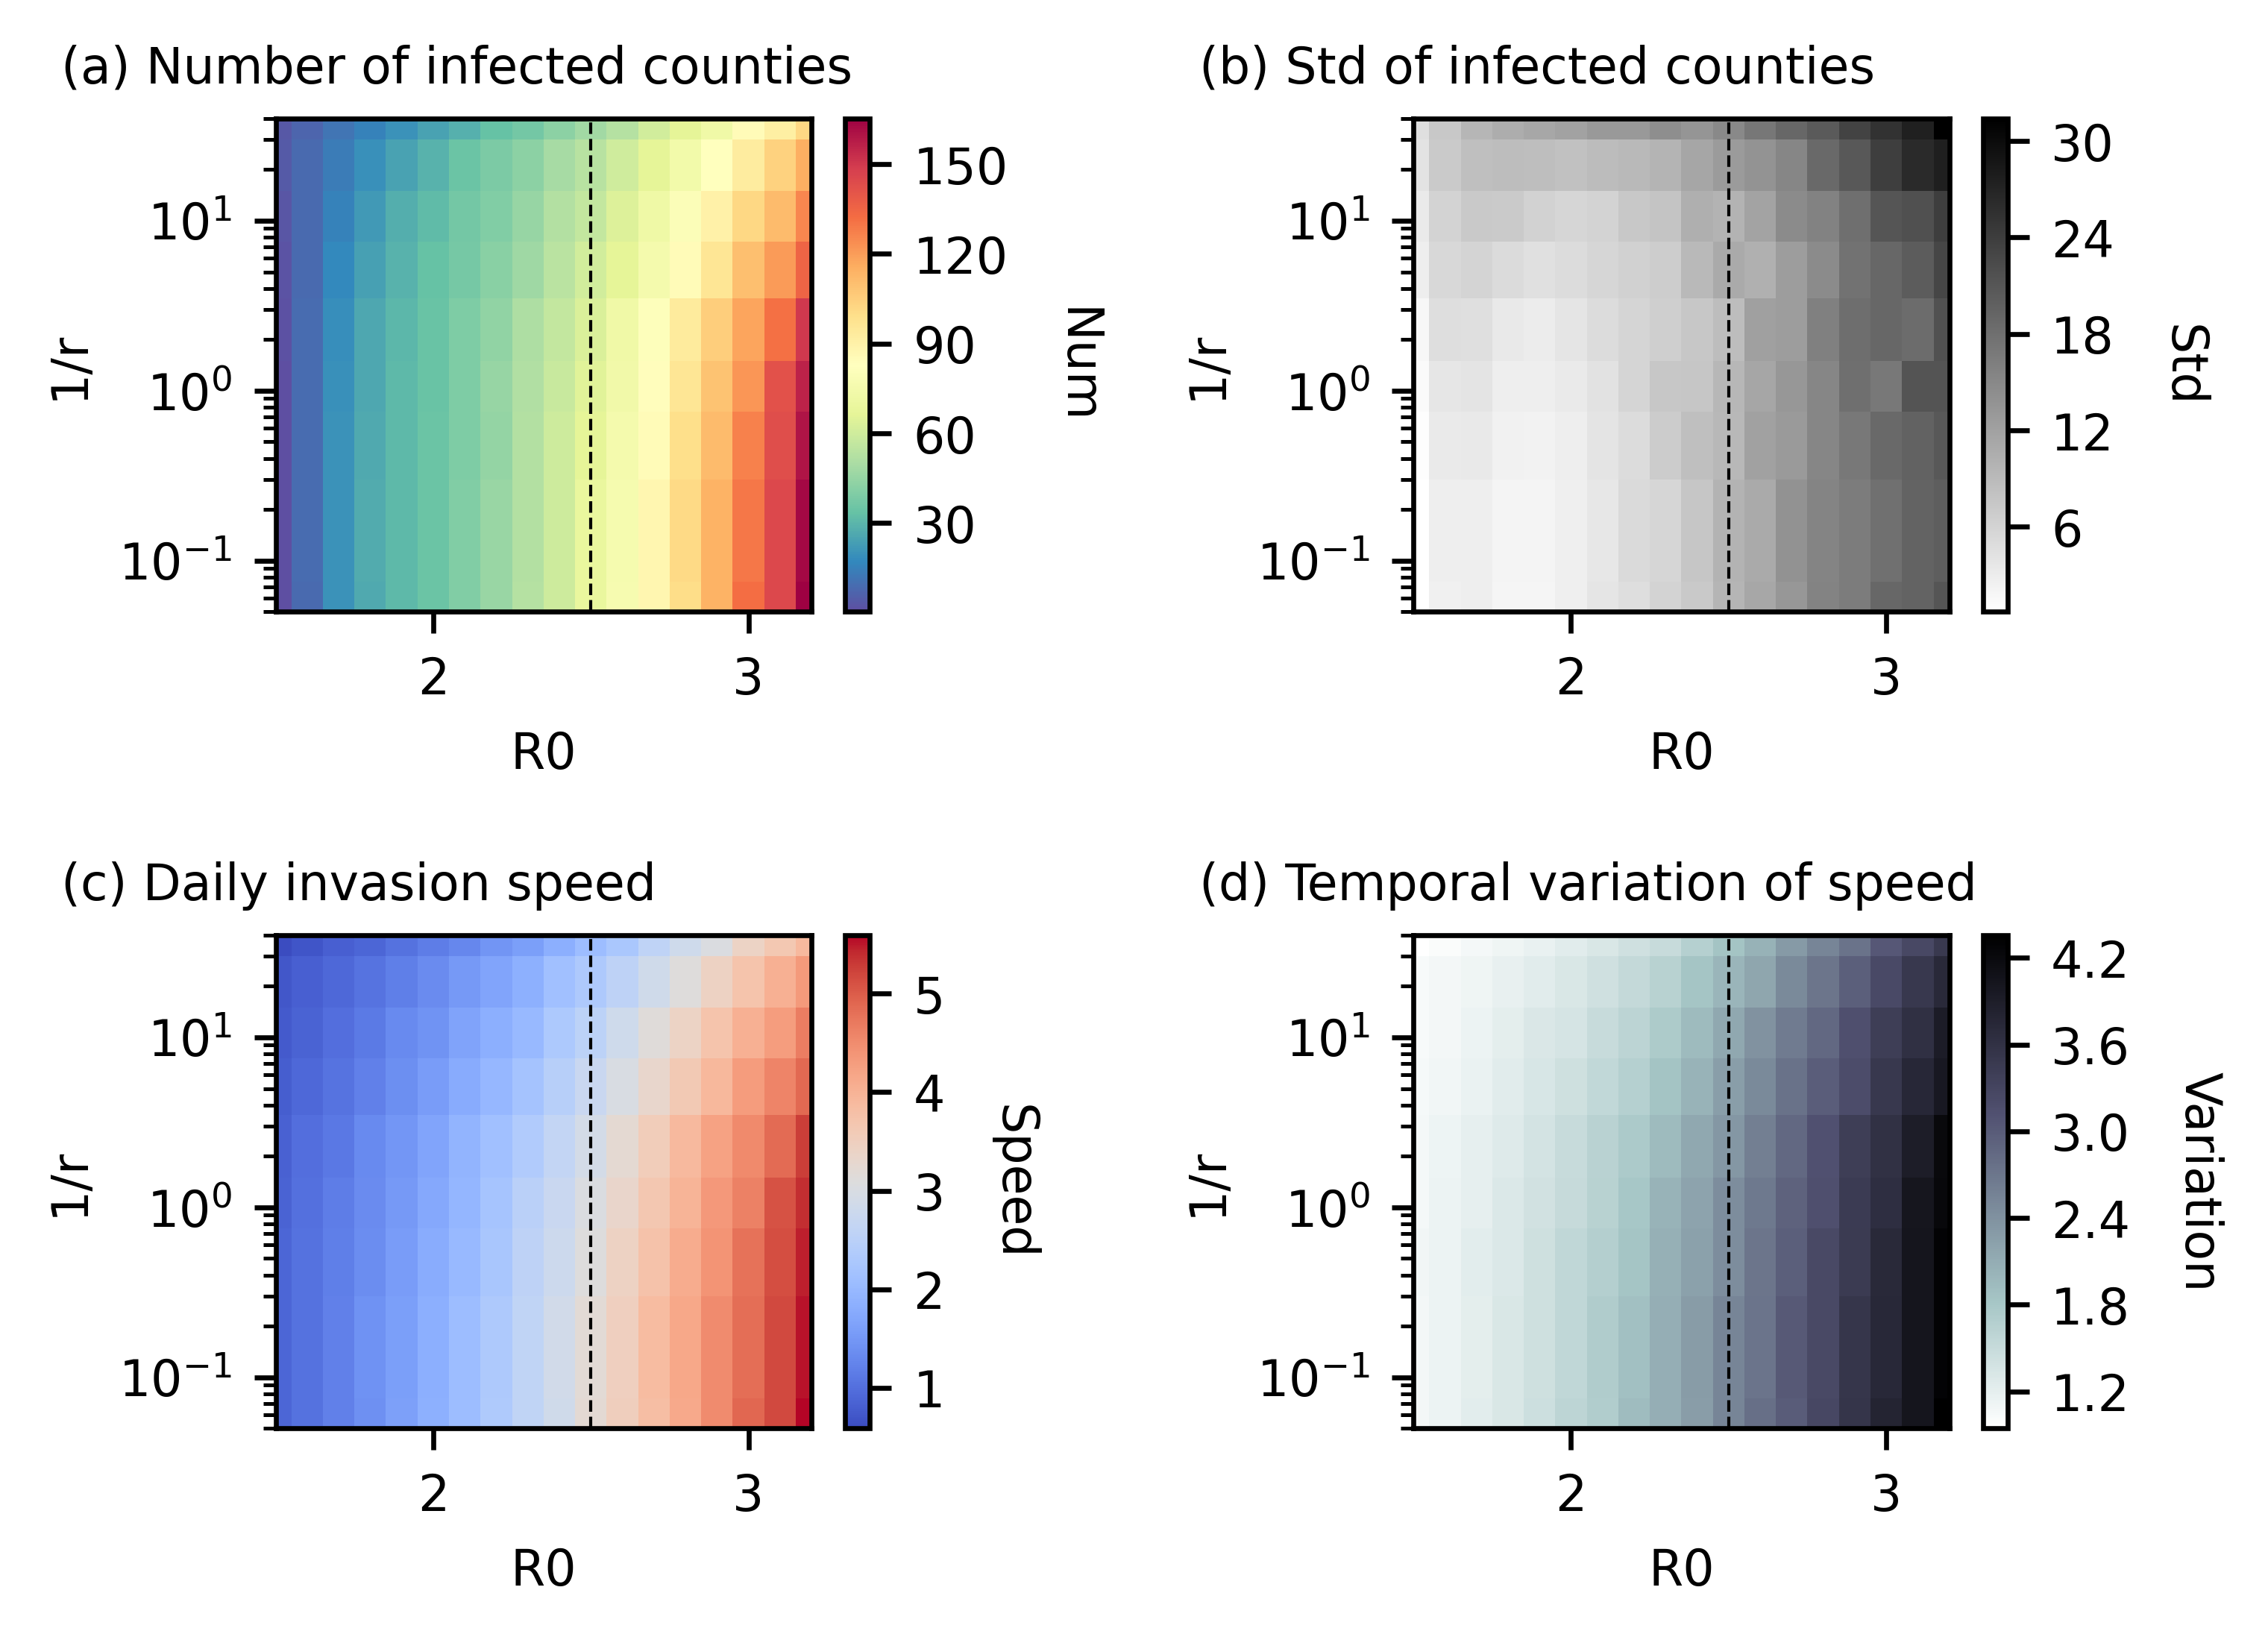

In [94]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import numpy as np

y = 1/rs
x = R0s

fig, axs = plt.subplots(2, 2, figsize=(5.2, 3.8), dpi=600)  # Adjust the figsize as needed
for i, ax in enumerate(axs.flatten()):
    X, Y = np.meshgrid(x, y)
    z_name = list(Z_data.keys())[i]
    # Transpose Z if needed for correct orientation
    Z = Z_data[z_name]
    if z_name == 'Num of Counties':
        norm = colors.TwoSlopeNorm(vmin=0, vmax=165, vcenter=90)

    # Create pcolormesh plot with the provided colormap
        contour = ax.pcolormesh(X, Y, Z, cmap=Z_colormap[z_name], norm=norm)
    else:
        contour = ax.pcolormesh(X, Y, Z, cmap=Z_colormap[z_name])

    # Add vertical line at x=2.5
    ax.axvline(x=2.5, color='k', linestyle='--', lw=0.5)

    # Set axis labels and scale for each subplot
    ax.set_xlabel('R0', fontsize=8)
    ax.set_ylabel('1/r', fontsize=8)
    ax.set_yscale('log')

    # Set axis limits
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([y[0], y[-1]])

    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=8)

    # Add colorbar with the provided label
    cbh = fig.colorbar(contour, ax=ax, orientation='vertical', pad=0.05)
    cbh.ax.tick_params(labelsize=8)
    cbh.set_label(z_name, rotation=270, labelpad=15, fontsize=8)

    # Set up the colorbar ticks
    locator = ticker.MaxNLocator(nbins=6)  # Customize the number of ticks here.
    cbh.locator = locator
    cbh.update_ticks()
    
    ax.text(-0.4, 1.15, sub_titles[i], transform=ax.transAxes, fontsize=8,
            va='top', ha='left')

plt.tight_layout()
plt.savefig('phase_v2.pdf',bbox_inches='tight')
# plt.savefig('phase_v2.eps',bbox_inches='tight',format='eps')

In [38]:
num_invaded = np.sum(invade_t,axis=0)

In [43]:
num_invaded

array([1.000e+00, 2.511e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03,
       2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03, 2.546e+03])

In [57]:
sp_invade_t = np.zeros((9, 300, 3142, 60))
for t in range(60):
    condition = Ensembles[:, :, :, t] > 1
    sp_invade_t[condition,t] = 1

In [58]:
sp_num_invade = np.sum(sp_invade_t,axis=2)
tau = np.diff(sp_num_invade,axis=2)
# avg_tau = np.average(tau,axis=1)

In [59]:
tau.shape

(9, 300, 59)

In [60]:
tau_std = np.std(tau,axis=2)

In [61]:
np.average(tau_std,axis=1)

array([4.78920053, 4.7495912 , 4.63557605, 4.60224113, 4.4205239 ,
       4.19990467, 4.01106327, 3.81268973, 3.56286395])

Text(0, 0.5, '$R_0$')

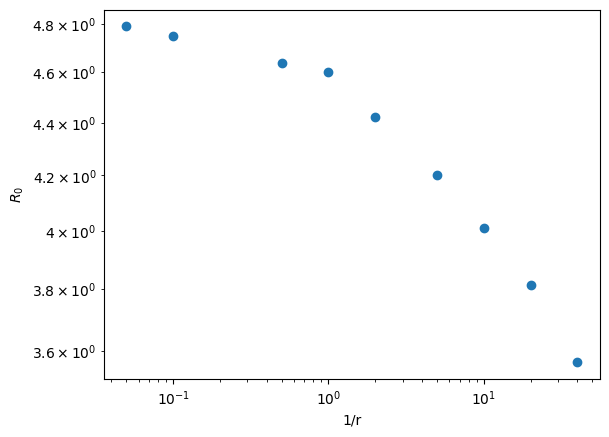

In [62]:
plt.scatter(1/rs, np.average(tau_std,axis=1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('1/r')
plt.ylabel(r'$R_0$')

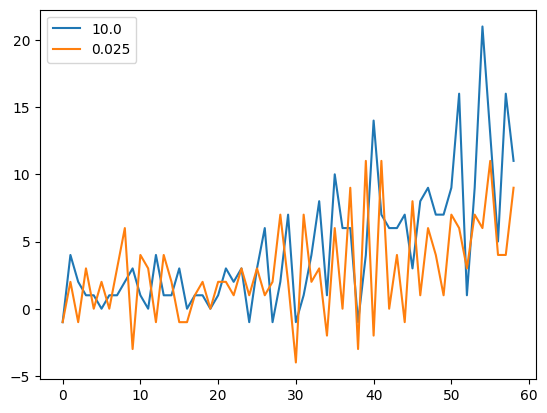

In [64]:
# plt.plot(np.diff(num_invaded),label='meta')
for i in [1,8]:
    plt.plot(tau[i,0],label=rs[i])
plt.legend()